### Baselines

This Notebook shows you to recreate the baseline results from the paper. It is currently set up to produce results for models "nflow", "ctgan", "tvae", "bayesian_network", and "copulagan" for the red wine dataset.

**Imports**

In [14]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.plugins import Plugins

**Load data**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = "red"
X = pd.read_csv("../data/winequality-white.csv", sep=';')

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("quality")]

col_list = X.columns[ind]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6.0
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6.0
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6.0
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6.0
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,6.0
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,5.0
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,6.0
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,7.0


**Fit model**

Re-run the notebook with different baseline models to generate all the baseline data from the paper.

In [16]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)
gens = Plugins()

baseline_models = ["bayesian_network", "ctgan", "tvae", "nflow"]

gen = gens.get(baseline_models[1])

[2023-09-12T15:08:14.164635+0200][3778][CRITICAL] module disabled: /home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_arf.py
[2023-09-12T15:08:14.166214+0200][3778][CRITICAL] module disabled: /home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_great.py


In [17]:
gen.fit(X_test)

 55%|█████▍    | 1099/2000 [14:58<12:16,  1.22it/s] 


**Evaluate synthetic data**

In [18]:
X_synth = gen.generate(count=X_test.shape[0]).dataframe()
X_synth.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-1.143506,0.190119,-2.727128,-0.911077,-0.786022,-0.065059,-0.891259,-0.891100,1.447085,-0.864089,0.678598,7.0
1,1.327408,0.124736,-1.126787,0.046361,-0.395215,-0.681098,-1.026456,-0.501184,-0.609681,-1.182110,1.174021,4.0
2,-1.061503,0.366334,-0.323088,0.130285,-1.355871,-0.028453,-0.529078,-0.603746,1.261019,0.925183,0.863218,6.0
3,-0.033657,-0.734715,-0.528330,-0.379293,-0.738011,-0.113923,-0.300024,-0.491421,1.081508,0.651140,0.864879,8.0
4,-0.727934,-0.082564,1.389963,2.263345,-0.384105,1.763931,1.092018,1.749101,0.194192,0.185375,-1.258305,5.0


In [26]:
from synthcity.metrics import eval_statistical
from synthcity.metrics import eval_detection
from synthcity.metrics import eval_performance


def evaluate_synthetic(X_synth, X_test):
    quality_evaluator = eval_statistical.AlphaPrecision()
    qual_res = quality_evaluator.evaluate(X_test, X_synth)
    qual_res = {k: v for (k, v) in qual_res.items() if "naive" in k}
    qual_score = np.mean(list(qual_res.values()))

    xgb_detector = eval_detection.SyntheticDetectionXGB(use_cache=False)
    mlp_detector = eval_detection.SyntheticDetectionMLP(use_cache=False)
    gmm_detector = eval_detection.SyntheticDetectionGMM(use_cache=False)

    xgb_det = xgb_detector.evaluate(X_test, X_synth)
    mlp_det = mlp_detector.evaluate(X_test, X_synth)
    gmm_det = gmm_detector.evaluate(X_test, X_synth)
    det_score = (xgb_det["mean"] + mlp_det["mean"] + gmm_det["mean"]) / 3

    return qual_score, det_score


X_synth_loader = GenericDataLoader(
    X_synth, 
    target_column='quality'
)
X_test_loader = GenericDataLoader(
    X_test, 
    target_column='quality'
)

res = evaluate_synthetic(X_synth_loader, X_test_loader)

print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[1]:.3f}")

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [27]:
X_synth_loader = GenericDataLoader(
    X_synth, 
    target_column="quality"
)
X_test_loader = GenericDataLoader(
    X_test, 
    target_column='quality'
)

xgb_evaluator = eval_performance.PerformanceEvaluatorXGB()
linear_evaluator = eval_performance.PerformanceEvaluatorLinear()
mlp_evaluator = eval_performance.PerformanceEvaluatorMLP()

xgb_score = xgb_evaluator.evaluate(X_test_loader, X_synth_loader)
linear_score = linear_evaluator.evaluate(X_test_loader, X_synth_loader)
mlp_score = mlp_evaluator.evaluate(X_test_loader, X_synth_loader)

gt_perf = (xgb_score["gt"] + linear_score["gt"] + mlp_score["gt"]) / 3
synth_perf = (
    xgb_score["syn_ood"] + linear_score["syn_ood"] + mlp_score["syn_ood"]
) / 3

In [21]:
gt_perf - synth_perf

0.2743373712288556

In [22]:
from synthcity.metrics import eval_statistical
from synthcity.metrics import eval_detection
from synthcity.metrics import eval_performance


def evaluate_synthetic(X_synth, X_test):
    quality_evaluator = eval_statistical.AlphaPrecision()
    qual_res = quality_evaluator.evaluate(X_test, X_synth)
    qual_res = {k: v for (k, v) in qual_res.items() if "naive" in k}
    qual_score = np.mean(list(qual_res.values()))

    xgb_evaluator = eval_performance.PerformanceEvaluatorXGB()
    linear_evaluator = eval_performance.PerformanceEvaluatorLinear()
    mlp_evaluator = eval_performance.PerformanceEvaluatorMLP()
    xgb_score = xgb_evaluator.evaluate(X_test, X_synth)
    linear_score = linear_evaluator.evaluate(X_test, X_synth)
    mlp_score = mlp_evaluator.evaluate(X_test, X_synth)
    gt_perf = (xgb_score["gt"] + linear_score["gt"] + mlp_score["gt"]) / 3
    synth_perf = (
        xgb_score["syn_ood"] + linear_score["syn_ood"] + mlp_score["syn_ood"]
    ) / 3

    xgb_detector = eval_detection.SyntheticDetectionXGB()
    mlp_detector = eval_detection.SyntheticDetectionMLP()
    gmm_detector = eval_detection.SyntheticDetectionGMM()
    xgb_det = xgb_detector.evaluate(X_test, X_synth)
    mlp_det = mlp_detector.evaluate(X_test, X_synth)
    gmm_det = gmm_detector.evaluate(X_test, X_synth)
    det_score = (xgb_det["mean"] + mlp_det["mean"] + gmm_det["mean"]) / 3

    return qual_score, (gt_perf, synth_perf), det_score


X_synth_loader = GenericDataLoader(
    X_synth
)
X_test_loader = GenericDataLoader(
    X_test
)

res = evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {res[1][0] - res[1][1]:.3f}"
)

cache loaded
cache loaded
cache loaded
Quality: 0.618
Detection: 0.722
Performance on real: 0.168, on synth: -0.107, diff: 0.274


**Generate TSNE plots**

In [23]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "quality"], axis=1)

In [24]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

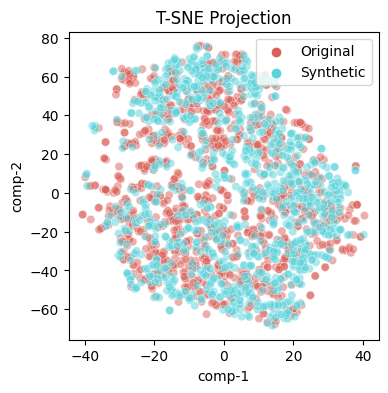

In [25]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()